# Finding the best neighborhood in Pittsburgh
## Processing Data with Python
### Overview
Defining what makes the best neighborhood in Pittsburgh requires infinite wisdom and knowledge on each community. Or data. We took into account: obesity rate, since we want a healthy populace; playgrounds, as promoters of an active and social community; the number of firearm seizures, since guns are scary; and playing fields, because, again, we want an active and connected community. We also attempted to correlate obesity to the number of playground to see if they have any effect on each other. Also, playgrounds are always a wild time so there's an added bonus for those. Lastly, we tried to take a list of the 100 most common female to see which neighborhood has the most unique names, but one issue came up: the dog database accomodates zipcodes, not neighborhoods. Sorry, no dogs
### Topics

* Obesity
* Playgrounds
* Crime
* Playing fields
* Not dogs

# Importing Libraries and Initializing Data: Obesity

Obesity rates are important because we want our children to be as healthy as possible. This data is from 2006-2010, so it is relatively recent

In [184]:
import numpy as np
import pandas as pd
obesity_pandas = pd.read_csv('Obesity.csv')
df = obesity_pandas[['City Neighborhood', '2006-2010 estimate of obesity']] 
df.info()
df.sort_values(by=['City Neighborhood'])
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
City Neighborhood                140 non-null object
2006-2010 estimate of obesity    416 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


,City Neighborhood,2006-2010 estimate of obesity
0,Bluff,0.246936
1,Central Business District,0.668012
2,Strip District,0.369996
3,Crawford Roberts,0.488691
4,West oakland,0.366391
5,North oakland,0.155867
6,Central Oakland,0.112780
7,Central Oakland,0.144556
8,South Oakland,0.281331
9,Middle Hill,0.608099


# Convert Categorical Data Municipality to Dummy Variables

In [112]:
df_dummies = pd.get_dummies(df['City Neighborhood'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['City Neighborhood']

In [5]:
x = df_new.values

# Print Correlation Matrix

In [6]:
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[ 1.          0.00610784 -0.04040271 ... -0.00503468  0.02902387
  -0.01362569]
 [ 0.00610784  1.         -0.00240964 ... -0.00240964 -0.00240964
  -0.00240964]
 [-0.04040271 -0.00240964  1.         ... -0.00240964 -0.00240964
  -0.00240964]
 ...
 [-0.00503468 -0.00240964 -0.00240964 ...  1.         -0.00240964
  -0.00240964]
 [ 0.02902387 -0.00240964 -0.00240964 ... -0.00240964  1.
  -0.00240964]
 [-0.01362569 -0.00240964 -0.00240964 ... -0.00240964 -0.00240964
   1.        ]]


# Introducing Playgrounds

Playgrounds are always a wild time. Let's see which communities have the most!

In [137]:
playgrounds_pandas = pd.read_csv('Playgrounds.csv')
pgdf= playgrounds_pandas[['neighborhood']]

In [114]:
df.corrwith(pgdf) #was df2.count before changes to what df2 is

2006-2010 estimate of obesity   NaN
dtype: float64

In [163]:
pgdf['neighborhood'].value_counts().head(20)

Squirrel Hill South         8
Beechview                   5
South Side Slopes           5
Sheraden                    4
Allegheny Center            4
Highland Park               4
South Oakland               3
Carrick                     3
Elliott                     3
Mount Washington            3
Crawford-Roberts            3
Beltzhoover                 3
Hazelwood                   3
Manchester                  2
Greenfield                  2
South Side Flats            2
Lincoln-Lemington-Belmar    2
Crafton Heights             2
Brookline                   2
Bloomfield                  2
Name: neighborhood, dtype: int64

Here we can see Squirrel Hill South's immense amount of playgrounds in both table and graph form

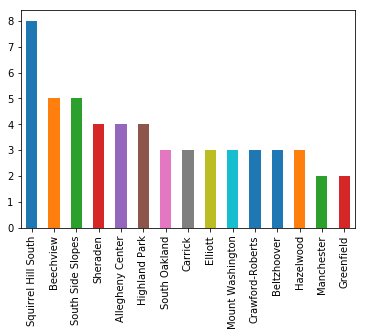

In [162]:
pgdf['neighborhood'].value_counts().head(15).plot(kind='bar')

# Firearm Seizures

We want our neighborhood to be as safe as possible so projectile-firing weapons are a no-go. Let's start by looking at a table containing all the neighborhoods and the amount of firearm seizures from 2015 to present day.

In [121]:
firearm_pandas = pd.read_csv("FirearmSeizures.csv")
fadf = firearm_pandas[["neighborhood","total_count"]]  

In [122]:
fadf['neighborhood'].value_counts().head(20)

Homewood South               145
South Side Flats             105
Larimer                       87
Homewood North                79
Hazelwood                     76
Carrick                       72
Marshall-Shadeland            70
Central Business District     69
Sheraden                      69
Perry South                   67
Knoxville                     61
Middle Hill                   60
Garfield                      60
Lincoln-Lemington-Belmar      57
Mount Washington              54
East Hills                    51
Brighton Heights              49
East Liberty                  48
Bedford Dwellings             47
Central Northside             43
Name: neighborhood, dtype: int64

Here we see Homewood South at the top. Let's look at this in graph form:

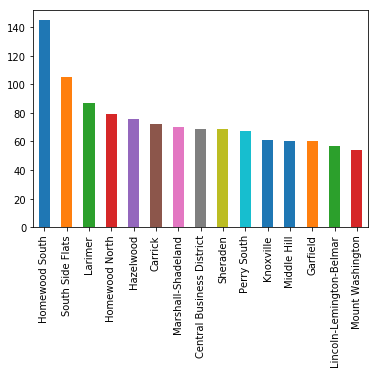

In [127]:
fadf['neighborhood'].value_counts().head(15).plot(kind='bar')

# Playing Fields

Onto playing fields:

In [128]:
fields_pandas = pd.read_csv("FirearmSeizures.csv")
pfdf = fields_pandas[["neighborhood","total_count"]] 
pfdf['neighborhood'].value_counts().head(20)

Homewood South               145
South Side Flats             105
Larimer                       87
Homewood North                79
Hazelwood                     76
Carrick                       72
Marshall-Shadeland            70
Central Business District     69
Sheraden                      69
Perry South                   67
Knoxville                     61
Middle Hill                   60
Garfield                      60
Lincoln-Lemington-Belmar      57
Mount Washington              54
East Hills                    51
Brighton Heights              49
East Liberty                  48
Bedford Dwellings             47
Central Northside             43
Name: neighborhood, dtype: int64

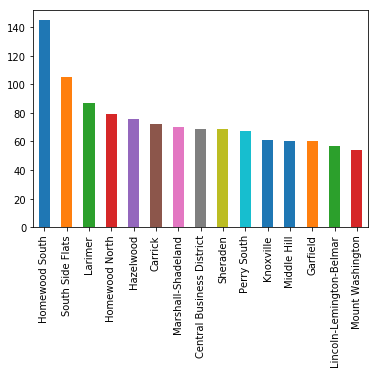

In [129]:
pfdf['neighborhood'].value_counts().head(15).plot(kind='bar')

# Interpreting the data

To translate these numbers into something meaningful, we created a completely scientific method: turn each value in each table into a value from 0-1 (to keep factors with high numbers like playing fields from being too heavily weighted) by dividing them by the maximum value in the table, multiply them by an 'importance rating' determined by facts and logic, then add them together. The highest total will be the winner!
* Firearm multiplier: -0.2
* Playing field multiplier: 0.2
* Playground multiplier: 0.3

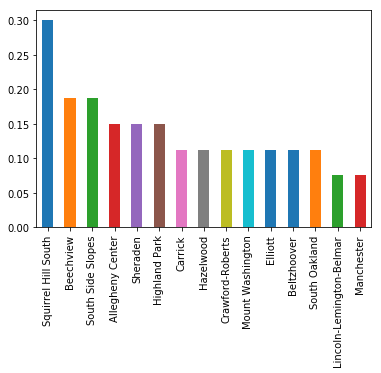

In [182]:
((fadf['neighborhood'].value_counts().div(145)*(-0.2))+(pfdf['neighborhood'].value_counts().div(145)*0.2)+(pgdf['neighborhood'].value_counts().div(8)*(0.3))).sort_values(ascending=False).head(15).plot(kind='bar')

As we can see, Squirrel Hill South is by far the best neighborhood in Pittsburgh. Beechview and South Side Slopes are neck and neck for second and third.